# Introduction to Python - Data Analysis with Pandas 

## Problem Set

In [40]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-20 18:34:02.822959


## Question 1

Run the following cell from the lecture to import the data on Bundesliga champions into a Pandas Series.

In [16]:
import pandas as pd
Df = pd.read_csv('data/champions.csv')
years = Df['Year']
ts = Df['Club']
ts.index = years

(a) How many clubs became champion at least once? How often was Bayern Munich champion?

(b) Use a Pandas command to see the first year in the data set. 

(c) Write a function that takes the data set and a year as arguments and prints the champion in this particular year. Which club won the championship in 1998? 

(d) Use the code provided in the lecture to generate a bar chart with all champions since 1963/64. Find a quick way to get a list of all clubs in the data set, with each club appearing only once.

In [37]:
## (a): This information is provided in the describe method
print(ts.describe())

## (b) 
print('The first observation is from {}.'.format(ts.index[0]) )

## (c)
def get_champ(ts, year):
    print('In {}, {} was Bundesliga champion.'.format(year, ts[year]) )

get_champ(ts, 1998)    
    

count                    54
unique                   12
top       FC Bayern München
freq                     26
Name: Club, dtype: object
The first observation is from 1964.
In 1998, 1. FC Kaiserslautern was Bundesliga champion.


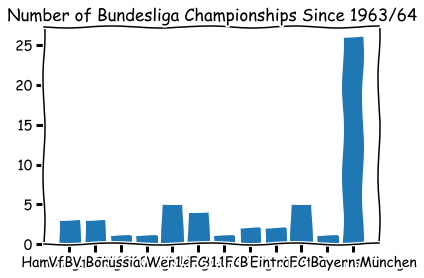

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(set(ts))
ts_num = ts.replace(names, range(0,len(names)))
count = ts_num.value_counts()

with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar(count.index, count)
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names)
    ax.set_title('Number of Bundesliga Championships Since 1963/64')

As an aside, if you don't the overlapping labels in the graph above, you can replace the names with abbreviations. here's a way to do this:

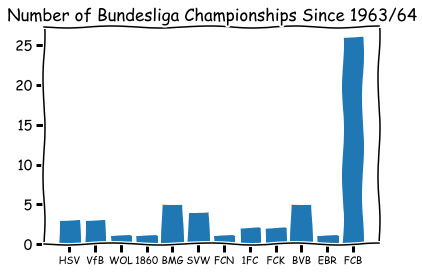

In [39]:
labels = {'FC Bayern München': 'FCB', 'Hamburger SV': 'HSV', 'Borussia Mönchengladbach': 'BMG', \
          'Werder Bremen': 'SVW', '1. FC Kaiserslautern': 'FCK', 'VfL Wolfsburg': 'WOL', \
          'Borussia Dortmund': 'BVB', 'TSV 1860 München': '1860', '1. FC Köln': '1FC', '1. FC Nürnberg': 'FCN', \
          'Eintracht Braunschweig': 'EBR', 'VfB Stuttgart': 'VfB'}
label_names = [labels[name] for name in names]
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar(count.index, count)
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(label_names, fontsize=10)
    ax.set_title('Number of Bundesliga Championships Since 1963/64')

## Question 2

Run the cell below which imports the data set on Bundesliga players and performs an operation similar to the one in the lecture, to get a column with last names and a column with first names.

In [56]:
df = pd.read_csv('data/BundesligaData.csv', sep = ';')

def reverse_name(name):
    L = name.split(" ")
    try:
        S = L[1] + " " + L[0]
    except:
        S = L[0]
    
    return S

df['name'] = df['name'].apply(reverse_name)
names = df['name'].str.split(expand=True)
# replace column 'name'
df['name'] = names[0]
## add column 'first name'
df['first_name'] = names[1]

(a) Who got the most scorer points in the 2016/17 season, and how many points did he get? A scorer point is awarded for both a goal and an assist.

(b) Are there any players in the data set that are younger than 25 and have scored more than 10 goals?


In [61]:
points = df['goals'] + df['assists']
print(df['name'].loc[ points.argmax() ])
print(points.max())

Lewandowski
34


In [72]:
A = (df['age'] < 25) & (df['goals'] >= 20)
A.any()

print(df.loc[A, 'name'])

12    Werner
Name: name, dtype: object


In [70]:
df[.head()]

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
0,Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
1,Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
2,Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
3,Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
4,Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas
5,Dembele,striker,28.0,28.0,20,6,11,6,0,1.6,66.8,0.2,7.41,3,Ousmane
6,Schuerrle,striker,23.0,30.0,26,2,2,3,0,2.4,72.1,0.6,6.89,3,Andre
7,Chicharito,striker,22.0,25.0,28,10,2,1,0,2.0,72.7,1.4,6.82,3,None
8,Embolo,striker,20.0,22.0,20,2,1,0,0,1.1,71.2,0.7,6.92,3,Breel
9,Coman,striker,20.0,20.0,20,2,1,1,0,1.1,84.9,0.4,6.80,3,Kingsley


## Question 2

The dataset used in this question comes from baseball, which may be a less-than exciting sport, but also one that generates a lot of data and is therefore very popular among (North American) data scientists. The file 'baseball_stats.csv' contains information on more than 18,000 players that have played in the US baseball league MLB at some point. The data includes the name, height and weight of a player, moreover its "handedness" (whether he bats with his left or right hand or both), his batting average (the percentage of at-bats in which he recorded a hit) and the number of home runs.

(a) Import the Pandas package and read the data in a Pandas dataframe. Use the **info** or the **head** method to make sure the data has been stored properly. 

(b) Find the player with the most homeruns in the history of the MLB. 

(c) How many players were recorded to be "switch hitters", i.e. to bat both left-handed or right-handed? Who has scored the most homeruns among this group?

(d) How often does an MLB player hit the ball on average? Using the **describe** method, you can see that the mean batting average is about 0.17. However, this includes a lot of players with an average of 0. Compute the mean batting average among those players who have actually hit something, i.e. with an average *greater than zero*.

(e) A popular question among baseball fans and analysts is whether there is a inherent difference in the batting performance between left- or right-handed batters. We can use a t-test to check the hypothesis that both groups come from the same population, i.e. that there is no systematic difference and all observed difference is due to sampling. Use the **ttest_ind** function in Scipy's **scipy.stats** module to compute a t-statistic under the null hypothesis
\begin{equation}
    \text{avg}_{LH} - \text{avg}_{RH} = 0.
\end{equation}
What can you conclude?


In [10]:
## Question (a)

# import pandas as pd

df = pd.read_csv('data/baseball_stats.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
name          18177 non-null object
handedness    16974 non-null object
height        18177 non-null object
weight        18177 non-null object
avg           18177 non-null float64
HR            18177 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 852.1+ KB
None
           name handedness height weight    avg   HR
0  Brandon Hyde          R     75    210  0.000    0
1   Carey Selph          R     69    175  0.277    0
2  Philip Nastu          L     74    180  0.040    0
3    Kent Hrbek          L     76    200  0.282  293
4   Bill Risley          R     74    215  0.000    0


In [24]:
## Question (b)

df.sort_values(by = 'HR', ascending = False, inplace = True)
print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].iloc[0]) )

## Question (c)

switch = df['handedness'] == 'B'
## create a data set consisting of switch hitters only
df_switch = df.loc[switch]
print('{} players were switch hitters.'.format( len(df_switch) ) )
print('Among those, the player with the most HRs is {}.'.format(df_switch['name'].iloc[0]) )

The player with the most HRs in the history of baseball is Barry Bonds.
1121 players were switch hitters.
Among those, the player with the most HRs is Mickey Mantle.


In [31]:
## Question (d)

index = df['avg'] > 0
print('Among players with a non-zero batting average, the mean average is {:.3}.'.format(df['avg'].loc[index].mean()) )

Among players with a non-zero batting average, the mean average is 0.223.


In [36]:
## Question (e)

# from scipy.stats import ttest_ind

## sample of batting averages for right-handed batters 
y0 = df['avg'].loc[df['handedness'].map(lambda x: x == 'R')]
## sample of batting averages for left-handed batters 
y1 = df['avg'].loc[df['handedness'].map(lambda x: x == 'L')]


stat = ttest_ind(y0, y1, equal_var = False)
print(stat)


Ttest_indResult(statistic=-9.9357022262421069, pvalue=3.8102742258882745e-23)
